<font color='green'> 
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**
12. Bölüm - Makine Öğrenmesi IV - Sınıflandırma Problemleri (338-339. videolar) - Vahit Keskin anlattı. </font>

# Lojistik Regresyon

### İçindekiler

### *Lojistik Regresyon - Teori*


### *Lojistik Regresyon - Model&Tahmin*

**Data Loading**
**Data Preprocessing**
- NaN değer bulunan satırları siliyoruz.

**Data Exploring**
- Bağımlı değişkeni inceliyoruz.
- Datasetinin istatistiksel değerlerine bakıyoruz.

**Creating Model with Statsmodels**
- Bağımsız ve bağımlı değişkeni belirliyoruz.
- Modeli kuruyoruz.
- Modelin çıktılarını değerlendiriyoruz.

**Creating Model with Scikit-Learn**
- Bağımsız ve bağımlı değişkeni belirliyoruz.
- Modeli kuruyoruz.
- Katsayılara bakıyoruz.

**Tahmin**
- Confusion matrix, accuracy score, classification report (accuracy, precision, recall, f1 score, macro average, weihted average) değerlerini alıyoruz.
- İlk 5 değer için yaptığı tahminleri alıyoruz.
- Her bir gözlem için y'nin hangi sınıfı hangi olasılıkla tahmin ettiğini görebiliyoruz.
- İlk 10 gözlem için y'nin gerçek değeri ile modelin tahmin ettiği değerleri karşılaştırıyoruz.
- Modelin bulduğu olasılık değerlerine atanacak 1-0 değerlerini kendi belirlediğimiz bir eşik ile buluyoruz.
- Yeni tahminlerimiz üzerinden tekrar bir confusion matrixi, doğruluk oranı raporları oluşturuyoruz.
- ROC eğrisi çizip AUC skoruna bakıyoruz.

**Model Tuning**
- Veri setimizi train ve test olarak ayırıyoruz.
- Bu sefer train setiyle modelimizi kuruyoruz.
- Test seti üzerinden accuracy_score alıyoruz.
- Cross validation ile bu skoru doğruluyoruz.

## Lojistik Regresyon - Teori

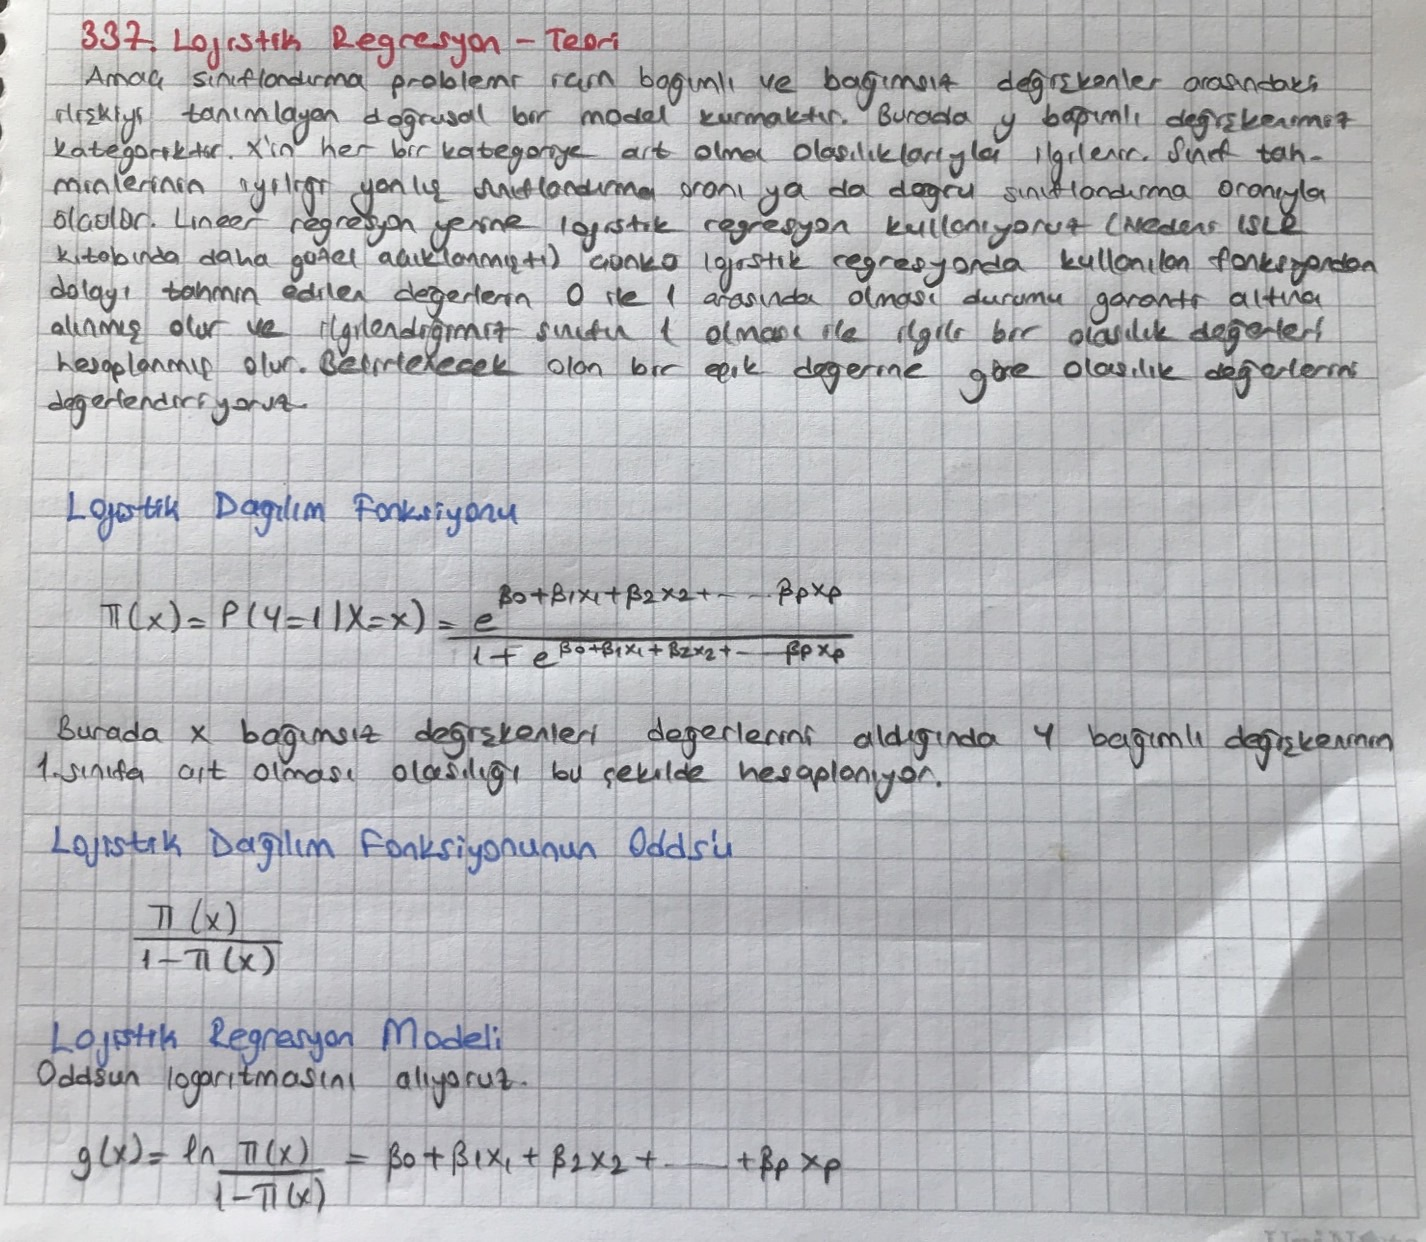

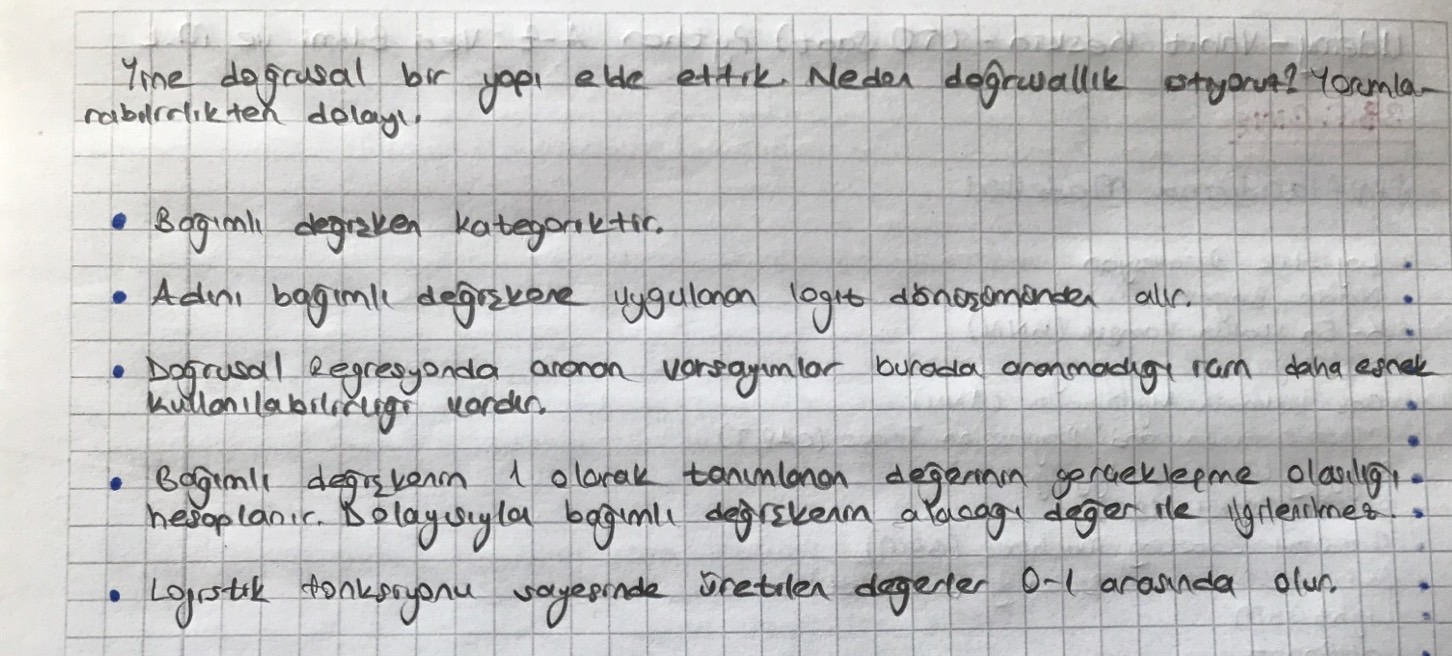

## Lojistik Regresyon - Model&Tahmin

### Data Loading

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = diabetes.copy()

<font color='blue'>*Önemli not: Sınıflandırma problemlerinde ele aldığımız bağımlı değişkenin/ilgilendiğimiz sınıfın doğru sınıf olup olmadığını kontrol edip bundan emin olmamız gerekmektedir. Sınıflandırma problemlerinde genellikle bu sık karşılaşılan bir problemdir. Örneğin; bir şekilde verinin oluşturulma şekliyle ilgilenilen sınıfın ne olduğunun karışması gibi bir durum söz konusu olur. Örneğin kredi ödeyip ödeyememe durumunda normalde genelde nadir olan olaya kredi ödeyememe durumuna odaklanılır, onları açığa çıkarmak, onların üzerine gitmeye çalışılır. Bu sebepten dolayı odak olay genelde o konu olur. Mesela şeker hastalığına sahip olup olmamak durumunda şeker hastalığına sahip olmak durumu, kanserli olup olmamak durumunda kanserli olmak durumuna odaklanılır. Ve bunlar genelde birinci sınıf olur. Dolayısıyla sınıflandırma problemlerinde başlamadan önce mutlaka bu sınıfın doğru atanıp atanmadığını, sizin tarafınızdan doğru belirlenip belirlenmediğini, binary dönüştürme işleminde bunun doğru gerçekleşip gerçekleşmediğini mutlaka mutlaka kontrol etmemiz gerekir. Çünkü çıkacak olan sonuçları değerlendirirken buna göre bir yorumlama yapacağımızdan; baştan bir kere yanlış giderse bütün bölümlerde yanlış gitmiş olacaktır.*</font>

### Data Preprocessing

#### <font color='green'>NaN değer bulunan satırları siliyoruz.</font>

In [5]:
df = df.dropna() 

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<font color='blue'> Bir hasta geldiğinde onun şeker hastası olup olmadığını tahmin edecek bir makine öğrenmesi modeli geliştirilebilir mi? Pregnancies: Geçirilen hamilelik sayısı, BloodPressure: Kan basıncı, BMI: Vücut kitle endeksi gibi bazı değişkenler var. Buradaki Outcome hedef/bağımlı değişkenimiz. Burada kişilerin çeşitli özellikleri geldiğinde onların şeker hastası olup olmayacağını belirli bir olasılık vererek tahmin etmeye çalışacağız. </font>

### Data Exploring

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


<font color='blue'> 768 gözlem bulunuyormuş. Burada bağımlı değişkenimiz Outcome kategorik olduğu halde fonksiyonel olarak düzgün çalışması için 1-0 şeklinde ele alındı. Burada ilgilendiğimiz sınıf 1 sınıf olacak diabet hastası ya da değili merak ediyoruz. </font>

#### <font color='green'>Bağımlı değişkeni inceliyoruz. </font>

<font color='blue'> Bağımlı değişkenin sayısına bakıyoruz. </font>

In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<font color='blue'> Bağımlı değişkenin sınıflarının sayısını barplotla görselleştiriyoruz.</font>

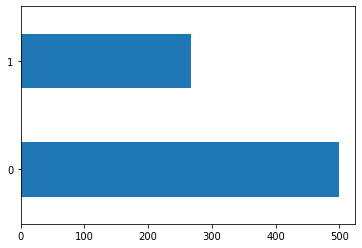

In [9]:
df["Outcome"].value_counts().plot.barh();

#### <font color='green'>Datasetinin istatistiksel değerlerine bakıyoruz.</font>

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


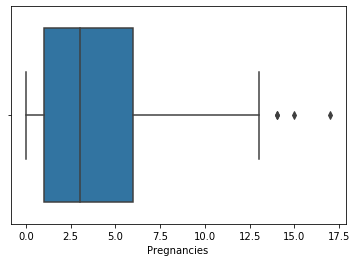

In [11]:
import seaborn as sns
sns.boxplot(x = df["Pregnancies"]);

<font color='blue'> Bağımlı değişkenimizi ayırt edici özelliğe sahip değişkenler acaba hangileri olabilir? Arka tarafta makinenin çözmeye çalışacağı şey bu. Age acaba burada nasıl bir etkiye sahip? BMI (Vücut kitle endeksi), Insulin direnci vs.</font>

### Creating Model with Statsmodels

In [12]:
import statsmodels.api as sm

#### <font color='green'>Bağımsız ve bağımlı değişkeni belirliyoruz. </font>

In [13]:
y = df["Outcome"]

X = df.drop(["Outcome"], axis=1) # Outcome'ı dışarıda bırakacak şekilde X'i oluşturuyoruz.

#### <font color='green'>Modeli kuruyoruz. </font>

In [14]:
loj = sm.Logit(y, X)

loj_model = loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


#### <font color='green'>Modelin çıktılarını değerlendiriyoruz. </font>

In [15]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sun, 19 Dec 2021   Pseudo R-squ.:                 0.05922
Time:                        15:49:46   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

<font color='blue'>SkinThickness, Insulin, BMI, DiabetesPedigreeFunction değişkenleri çok anlamlı gözükmüyor. Burada katsayıları yorumlarken lineer regresyondaki gibi değil modeli oluştururkenki yapmış olduğumuz logaritmik dönüşümün tersini alarak yorumlamamız gerekiyor. </font>

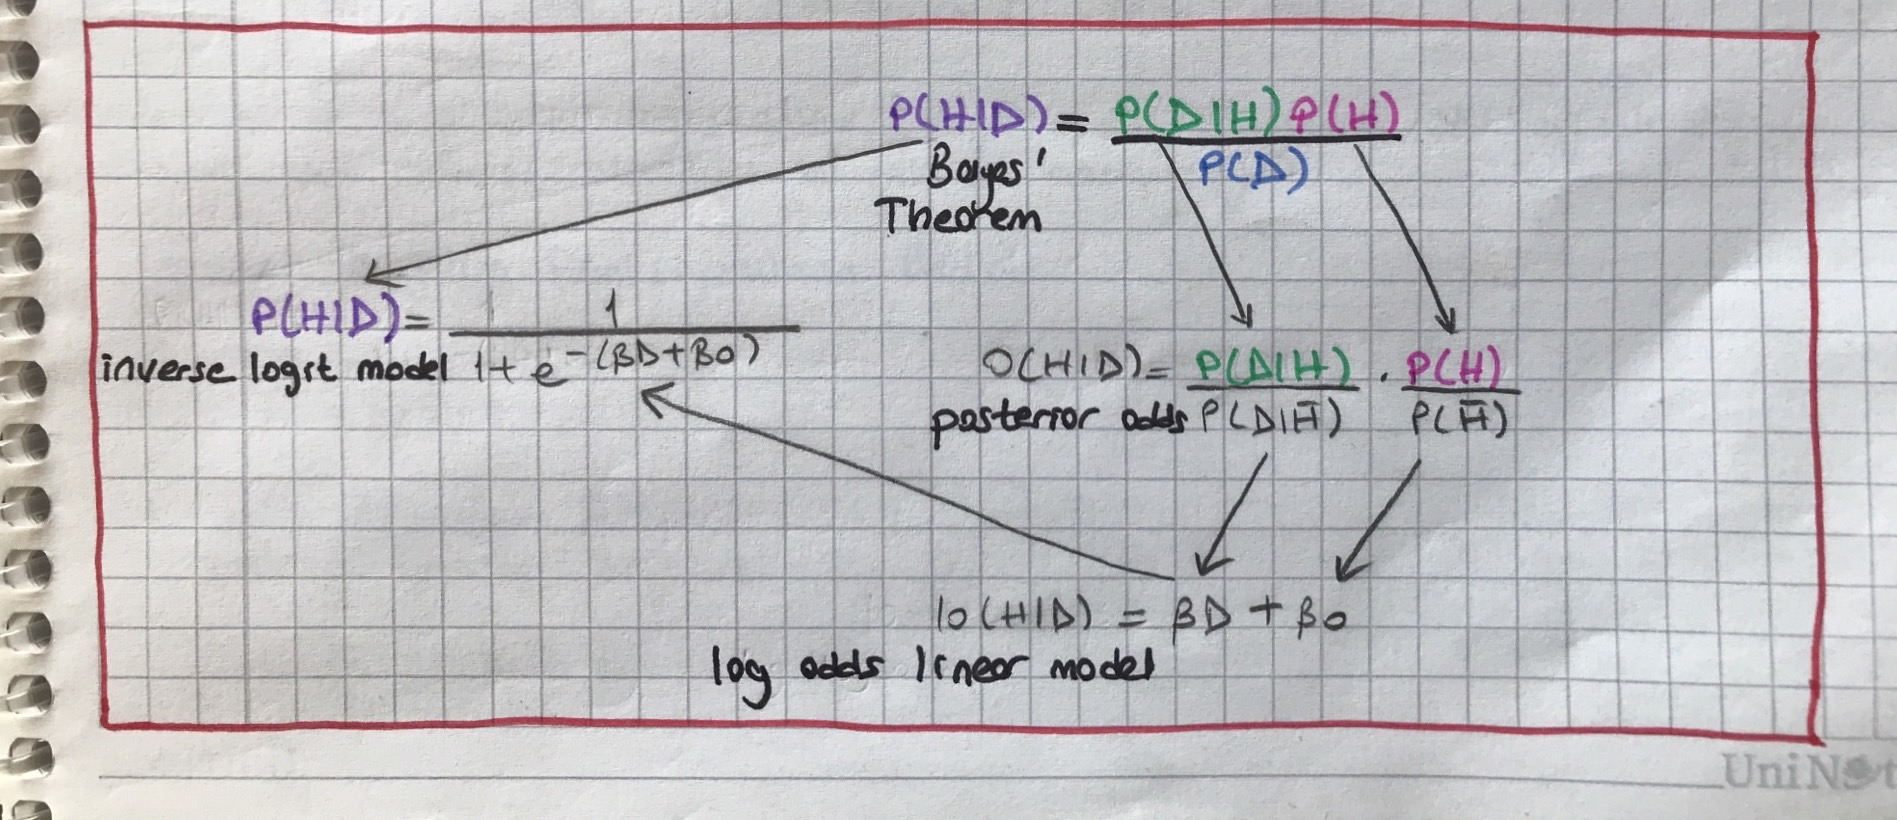

### Creating Model with Scikit-Learn

#### <font color='green'>Bağımsız ve bağımlı değişkeni belirliyoruz. </font>

In [16]:
y = df["Outcome"]

X = df.drop(["Outcome"], axis=1)

#### <font color='green'>Modeli kuruyoruz. </font>

<font color='blue'>*Şu an sadece modelin nasıl çalıştığını görmek için train-test ayrımı yapmadık.* </font>

In [17]:
from sklearn.linear_model import LogisticRegression

loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### <font color='green'>Katsayılara bakıyoruz. </font>

In [18]:
loj_model.intercept_

array([-5.89159518])

In [19]:
loj_model.coef_ #bütün bağımsız değişkenlerin katsayılarını almış oluyoruz.

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

### Tahmin 

#### <font color='green'>**Confusion matrix, accuracy score, classification report (accuracy, precision, recall, f1 score, macro average, weihted average) değerlerini alıyoruz.**</font>

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [21]:
y_pred = loj_model.predict(X) 

In [22]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

<font color='black'>
    
- 448: Gerçekte 1 iken 1 denilenler
    
- 52: Gerçekte 0 iken 1 denilenler
    
- 121: Gerçekte 1 iken 0 denilenler
    
- 148: Gerçekte 0 iken 0 denilenler
</font>

In [23]:
accuracy_score(y,y_pred)

0.7747395833333334

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



#### <font color='green'>İlk 5 değer için yaptığı tahminleri alıyoruz.</font>

In [25]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

#### <font color='green'>Her bir gözlem için y'nin hangi sınıfı hangi olasılıkla tahmin ettiğini görebiliyoruz.</font>

In [26]:
loj_model.predict_proba(X)[0:10]

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

 <font color='blue'>İlk sütun 0'a ait olasılıklar, ikincisi 1 sınıfına ait olasılıkları ifade ediyor. Scikit-learn'de eğer olasılık değeri 0.5'ten büyükse o sınıfa 1 değerini atıyor.  </font>

#### <font color='green'>İlk 10 gözlem için y'nin gerçek değeri ile modelin tahmin ettiği değerleri karşılaştırıyoruz.</font>

In [27]:
# modelin tahminleri
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [28]:
# gerçek y değerleri
y[0:10] 

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

#### <font color='green'>Modelin bulduğu olasılık değerlerine atanacak 1-0 değerlerini kendi belirlediğimiz bir eşik ile buluyoruz.</font>

<font color='blue'>Scikit-learn olasılığı 0.5'ten büyükse 1 değerini atıyordu. Biz 0.7'den büyükse atayalım. Bu durumda 0 için olasılık değerinin 0.3'ten büyük olması gerekir. </font>

In [29]:
y_probs = loj_model.predict_proba(X) 
y_probs = y_probs[:,1] # Sadece 2. sütunu çekmiş olduk, yani 1 veren kısmı.

In [30]:
loj_model.predict_proba(X)[0:10]

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [31]:
y_probs[0:10]  # evet sonuçları doğru veriyor.

array([0.64959289, 0.08298071, 0.77525915, 0.07861124, 0.8327758 ,
       0.20101325, 0.11980894, 0.7218731 , 0.67939057, 0.07727116])

In [32]:
y_pred = [1 if i>0.7 else 0 for i in y_probs]

In [33]:
y_pred[0:10]

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]

#### <font color='green'>Yeni tahminlerimiz üzerinden tekrar bir confusion matrixi, doğruluk oranı raporları oluşturuyoruz. </font>

In [34]:
confusion_matrix(y, y_pred)

array([[487,  13],
       [188,  80]], dtype=int64)

In [35]:
accuracy_score(y, y_pred)

0.73828125

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       500
           1       0.86      0.30      0.44       268

    accuracy                           0.74       768
   macro avg       0.79      0.64      0.64       768
weighted avg       0.77      0.74      0.69       768



#### <font color='green'>ROC eğrisi çizip AUC skoruna bakıyoruz.</font>

<font color='blue'> Accuracy_score doğru yaptığımız işler/tüm işler idi. AUC ise ROC eğrisinin altında alan kalan alanı ifade ediyordu. ROC eğrisinde yer alan ortaki çzigi hiçbir sınıflandırma modeli yapmasak tüm değerlere rastgele 1-0 değerini atasak zaten olacak olan çizgiydi, ondan uzakta olmaya çalışıyoruz.   </font>

In [37]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64959289, 0.08298071, 0.77525915, 0.07861124, 0.8327758 ])

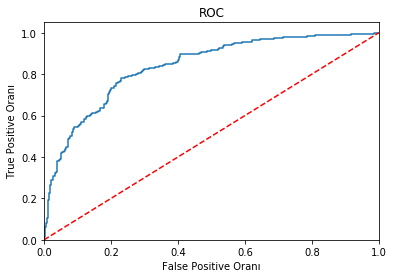

In [38]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

<font color='black'>

- `roc_auc_score(y, loj_model.predict(X))` ile roc_auc_scoru hesaplanıyor.

    
- Roc curve oluşturmak için `fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])` fonksiyonunu kullanıyoruz. fpr: false positive rate, tpr: true positive rate ve thresholds değerleri 

    
- `plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)` bu değerler üzerinden eğri oluşturuyoruz.
    
</font>

<font color='blue'>
Buradaki mavi çizgi modelimizin başarısını hesaplamak için kullanacak olduğumuz eğri. Buradaki kırmızı çizgi hiçbir modelleme çalışması yapmasaydım zaten elde edecek olduğum başarıyı ifade ediyor. Bu çizgiden ne farkım var sorusuna biz mümkün olduğu kadar bu çizgiden uzaklaşarak cevap vermeye çalışıyoruz. Bu eğrinin altındaki alan AUC bize başarımızın ne olduğuyla ilgili bir bilgi sunmuş oluyor.
    
</font>

### Model Tuning

<font color='blue'>Lojistik regresyonun model hiperparametresi yok. Burada optimize edilecek, bir parametre olarak değerlendirilebilecek olan tek parametre sabit değer. Dolayısıyla burada bir model tuning işlemi değil de tam anlamıyla model doğrulama işlemi gerçekleştireceğiz. Bunun için data setimizi train ve test olarak ayıracağız. Cross-validation ile bir hata elde edeceğiz diğer modellerle karşılaştırmamıza yarayan bir değer olacak bu. </font>

#### <font color='green'>Veri setimizi train ve test olarak ayırıyoruz.</font>

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

#### <font color='green'>Bu sefer train setiyle modelimizi kuruyoruz.</font>

In [40]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### <font color='green'>Test seti üzerinden accuracy_score alıyoruz.</font>

In [41]:
accuracy_score(y_test, loj_model.predict(X_test)) 

0.7532467532467533

#### <font color='green'>Cross validation ile bu skoru doğruluyoruz.</font>

In [42]:
cross_val_score(loj_model, X_test, y_test, cv = 10)  

# ilk argüman (train set üzerinden kurduğumuz) modeli ifade ediyor, 
# ikinci argüman bu modelin içerisine yerleştirilmek istenen bağımsız değişken setini ifade ediyor,
# üçüncü argüman bunun sonucunda çıkacak olan ^y lerle karşılaştırmak istediğimiz y değerlerini ifade ediyor,
# dördüncü argüman cross validationı ifade ediyor 10 katlı olsun dedik.

array([0.79166667, 0.82608696, 0.73913043, 0.82608696, 0.73913043,
       0.91304348, 0.7826087 , 0.65217391, 0.65217391, 0.7826087 ])

<font color='blue'>Çalıştırdığımızda bize 10 adet hesaplama işlemi gerçekleştirmiş oldu. 
- Valide edilmemiş sınama seti yaklaşımıyla değeri incelediğimizde `accuracy_score(y_test, loj_model.predict(X_test))` 0.75 çıktı.
- `cross_val_score(loj_model, X_test, y_test, cv = 10 )` sonucuna baktığımızda burada 0.7 de var, 0.75 de var, 0.63 de var, 0.5 de var. Bunun ortalamasını alırsak bize en doğru sonucu verecektir.  
</font>

In [43]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7704710144927536